### Forza Horizon 4 User Prediction 

In [1]:
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as ddt

## Horizon 4

In [2]:
df_forza4=pd.read_csv('forza_horizon4_price.csv',index_col=None)

In [3]:
df_forza4['DateTime']=pd.to_datetime(df_forza4['DateTime'])

In [4]:
df_forza4['Year']=df_forza4['DateTime'].dt.year
df_forza4['Month']=df_forza4['DateTime'].dt.month
df_forza4['Day']=df_forza4['DateTime'].dt.day

In [5]:
forza4_price=df_forza4[['DateTime','Players','Final Price','Discount','Year','Month','Day']].copy()

In [6]:
forza4_price.head()

,DateTime,Players,Final Price,Discount,Year,Month,Day
0,2021-03-09,3125,59.99,0,2021,3,9
1,2021-03-10,14609,59.99,0,2021,3,10
2,2021-03-11,20203,59.99,0,2021,3,11
3,2021-03-12,21235,59.99,0,2021,3,12
4,2021-03-13,23993,59.99,0,2021,3,13


In [7]:
forza4_price['DateTime']

0     2021-03-09
1     2021-03-10
2     2021-03-11
3     2021-03-12
4     2021-03-13
         ...    
866   2023-07-23
867   2023-07-24
868   2023-07-25
869   2023-07-26
870   2023-07-27
Name: DateTime, Length: 871, dtype: datetime64[ns]

In [8]:
forza4_price['Date']=forza4_price['DateTime'].map(ddt.datetime.toordinal)
forza4_price.head()

,DateTime,Players,Final Price,Discount,Year,Month,Day,Date
0,2021-03-09,3125,59.99,0,2021,3,9,737858
1,2021-03-10,14609,59.99,0,2021,3,10,737859
2,2021-03-11,20203,59.99,0,2021,3,11,737860
3,2021-03-12,21235,59.99,0,2021,3,12,737861
4,2021-03-13,23993,59.99,0,2021,3,13,737862


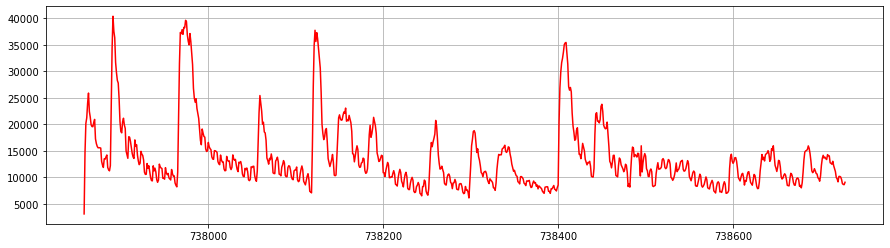

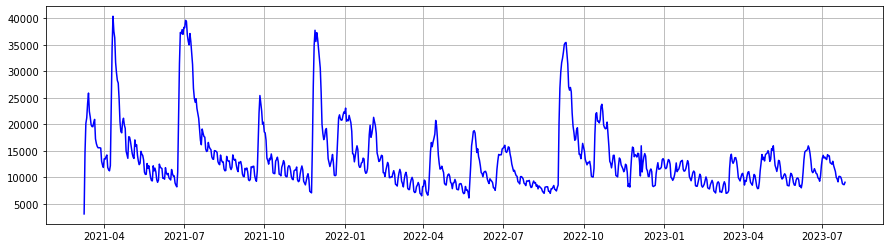

In [25]:
plt.figure(figsize=(15,4))
plt.plot(forza4_price['Date'],forza4_price['Players'],c='r')
plt.grid()
plt.show()

plt.figure(figsize=(15,4))
plt.plot(forza4_price['DateTime'],forza4_price['Players'],c='b')
plt.grid()
plt.show()

In [45]:
i=0
while(forza4_price.Date[i]!=738250):
    i=i+1
print(i)

392


In [33]:
count=0
for i in range(len(forza4_price)):
    if((forza4_price.Year[i]==2021) or ((forza4_price.Year[i]==2022)):
        print(forza4_price.Date[i])
        count=count+1
print(count)

737858
737859
737860
737861
737862
737863
737864
737865
737866
737867
737868
737869
737870
737871
737872
737873
737874
737875
737876
737877
737878
737879
737880
737881
737882
737883
737884
737885
737886
737887
737888
737889
737890
737891
737892
737893
737894
737895
737896
737897
737898
737899
737900
737901
737902
737903
737904
737905
737906
737907
737908
737909
737910
737911
737912
737913
737914
737915
737916
737917
737918
737919
737920
737921
737922
737923
737924
737925
737926
737927
737928
737929
737930
737931
737932
737933
737934
737935
737936
737937
737938
737939
737940
737941
737942
737943
737944
737945
737946
737947
737948
737949
737950
737951
737952
737953
737954
737955
737956
737957
737958
737959
737960
737961
737962
737963
737964
737965
737966
737967
737968
737969
737970
737971
737972
737973
737974
737975
737976
737977
737978
737979
737980
737981
737982
737983
737984
737985
737986
737987
737988
737989
737990
737991
737992
737993
737994
737995
737996
737997
737998
737999
738000

In [35]:
print(forza4_price['Date'][0:664])

0      737858
1      737859
2      737860
3      737861
4      737862
        ...  
659    738517
660    738518
661    738519
662    738520
663    738521
Name: Date, Length: 664, dtype: int64


### 2021-2022

In [17]:
from sklearn.model_selection import train_test_split

In [133]:
X=forza4_price['Date'][0:391]
Y=forza4_price['Players'][0:391]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8 , random_state=100)

In [134]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

/var/folders/ld/zxygdjc50qn3ct35m3lccwg80000gn/T/ipykernel_26785/1179647778.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]
/var/folders/ld/zxygdjc50qn3ct35m3lccwg80000gn/T/ipykernel_26785/1179647778.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis]


In [135]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

In [136]:
print(lr.intercept_)
print(lr.coef_)

13069256.544267809
[-17.68656012]


In [137]:
print(lr.coef_*28)
print((lr.coef_)*28+lr.intercept_)

[-495.22368349]
[13068761.32058432]


### In the year 2021-2022, average decrease 500K per month 500000 (check data below)

In [73]:
forza4_price.head()

,DateTime,Players,Final Price,Discount,Year,Month,Day,Date
0,2021-03-09,3125,59.99,0,2021,3,9,737858
1,2021-03-10,14609,59.99,0,2021,3,10,737859
2,2021-03-11,20203,59.99,0,2021,3,11,737860
3,2021-03-12,21235,59.99,0,2021,3,12,737861
4,2021-03-13,23993,59.99,0,2021,3,13,737862


In [75]:
for i in range(392):
    if((forza4_price.Year[i]==2021) or (forza4_price.Year[i]==2022)):
        month=forza4_price.groupby(by='Month')['Players'].sum()
print(month)        



Month
1      858158
2      631245
3      984317
4     1326295
5     1063595
6     1136205
7     1461301
8      658237
9     1099252
10     915728
11     793196
12     961122
Name: Players, dtype: int64


In [77]:
np.mean(month.pct_change())

0.07545846573227498

### 2022-23

In [78]:
print(len(forza4_price))

871


In [146]:
month2=forza4_price.groupby(["Year", "Month"])['Players'].sum() 
print(month2)
print(402404+632724+397251+450776+785979+408197+407330+393751)

Year  Month
2021  3        402404
      4        632724
      5        397251
      6        450776
      7        785979
      8        408197
      9        407330
      10       393751
      11       426320
      12       592872
2022  1        494720
      2        376256
      3        274108
      4        366345
      5        315626
      6        340294
      7        360456
      8        250040
      9        691922
      10       521977
      11       366876
      12       368250
2023  1        363438
      2        254989
      3        307805
      4        327226
      5        350718
      6        345135
      7        314866
Name: Players, dtype: int64
3878412


In [141]:
print('**2021-2022**')
print(397251-632724)
print(632724-402404)
print(785979-450776)
print(785979-408197)
print('average:450k')

print('**2022-2023**')

print(592872-426320)
print(494720-592872)
print(376256-494720)
print(314866-345135)
print('average:100k')

**2021-2022**
-235473
230320
335203
377782
average:450k
**2022-2023**
166552
-98152
-118464
-30269
average:100k


In [120]:
X2=forza4_price['Date'][393:]
Y2=forza4_price['Players'][393:]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, train_size=0.8 , random_state=100)

In [121]:
X_train2 = X_train2[:, np.newaxis]
X_test2 = X_test2[:, np.newaxis]

/var/folders/ld/zxygdjc50qn3ct35m3lccwg80000gn/T/ipykernel_26785/7030260.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train2 = X_train2[:, np.newaxis]
/var/folders/ld/zxygdjc50qn3ct35m3lccwg80000gn/T/ipykernel_26785/7030260.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test2 = X_test2[:, np.newaxis]


In [122]:
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train2, y_train2)

LinearRegression()

In [123]:
print(lr.intercept_)
print(lr.coef_)

2657406.1409390853
[-3.58196389]


In [125]:
print((lr.coef_)*28)
print((lr.coef_)*28+lr.intercept_)

[-100.29498891]
[2657305.84595018]


### In the year 2022-2023, average decrease 100K per month 100000